# A proof of concept with 2D points which are 1D encoded

A generator of points in the 7*7 space

In [1]:
import numpy as np
import pandas as pd
def generator(n):
    rng = np.random.default_rng()
    x=rng.integers(0, high=7, size=n)-3
    y=rng.integers(0, high=7, size=n)-3
    return np.stack((x,y)).T

def encode(a):
    return a[:,1]+3+7*(a[:,0]+3)
        

In [2]:
a= generator(4)
a

array([[ 3,  3],
       [-1,  0],
       [ 2,  1],
       [-3, -1]])

In [3]:
encode(a)

array([48, 17, 39,  2])

Define a distance $|a-b|$. Take a ball of half diameter R and one of 2R. Enumerate the points in B(R) and those in B(2R). We ll call these numbers n(R) and n(2R). $log_2(n(2R)/n(R))= log(n(2R)/n(R))/log(2)$ should converge toward the initial dimension. The one where our problem 'lives'.
At least that the idea if we could trace the elements of a ball from its projection... But we can't.
However we can look at spherical caps.
The regularized incomplete beta function $I_z(a,b)$ (also called the regularized beta function) is widely used in statistics and some areas of physics as the cumulative distribution function of the beta distribution. It represent the CDF for a random number Y that obeys the beta distribution.
For n dim projected onto 1, we have $n(R)/n(R/2)=\frac{1}{1-I_{3/4}((n+1)/2,1/2)}$



In [14]:
import scipy as spy

In [15]:
#verif en 2D
1/(1-spy.special.betainc(1.5,.5,.75))

1.6420421077484577

In [16]:
#verif en 3D

1/(1-spy.special.betainc(2,.5,.75))

1.4545454545454546

Those 2 are validated by our little simulation. What if the number of dims becomes big? One way to go would be to compare a cap very close to a half ball to the half ball (so $sin(\alpha)$ comes close to one and $cos(\alpha)$ to 0). The general formula if we measure the number of points in B(R) and in $B(R\sqrt{1-z})$ is $n(R)/n(R\sqrt{1-z})=\frac{1}{1-I_{z^2}((n+1)/2,1/2)}$ for $z = sin(\alpha)$

In [17]:
t = np.arange(1,1000)

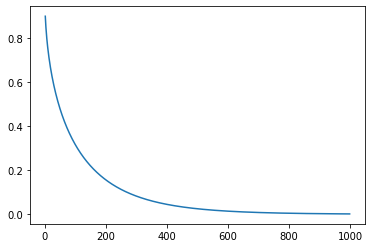

In [18]:
I=spy.special.betainc((t+1)/2,.5,0.99)
plt.plot(t,I)

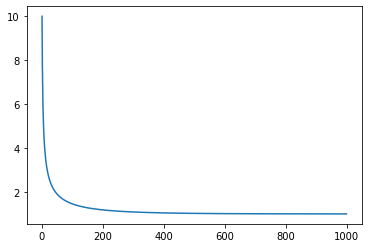

In [19]:
J=1/(1-I)
plt.plot(t,J)

also, what would be the formula if we have a projection in k dim of a ball in n dim? (where k could be more than n)
One way to go is obviously to project the k dim in one dim (by taking just one coordinate - this could be done for each coordinate as a sanity check)

In [20]:
a=generator(10000)
enc = encode(a)

take 2R=24 and the center of the ball 24

In [21]:
inBall12 = (enc<37)&(enc>11)
inBall24 = len(enc)

In [22]:
np.log(np.sum(inBall24)/np.sum(inBall12))/np.log(2)

0.97397902928563

shit. It says it is a dim1 story.
What if we take a projection instead of an encoding? ... Obviously it will live in one dim because of the way it is generated.
Our apparently random simple generator is indeed 1D biased when covering the plane.


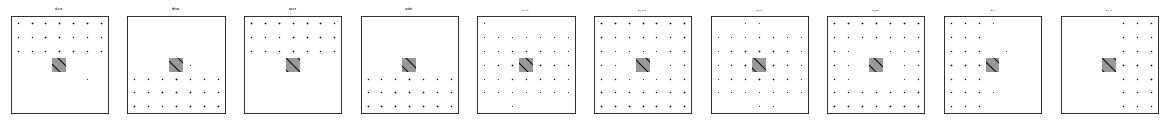

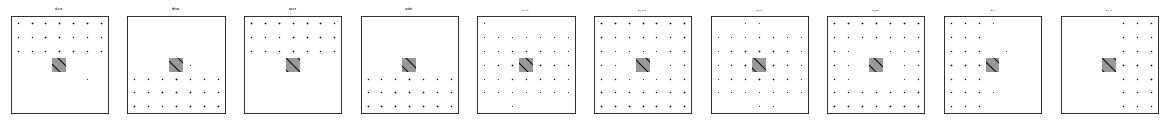

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
from scipy.stats import mstats, spearmanr, pearsonr
from scipy.spatial.distance import cosine, correlation
voc = [
    'above', 'below',
    'over', 'under',
    'next_to', 'away_from',
    'near_to', 'far_from',
    'left_of', 'right_of',
]
voc_rep_org = [
    # above
    np.array([
        [7.00, 7.66, 8.10, 8.61, 8.19, 7.32, 7.66],
        [6.69, 6.56, 7.66, 8.55, 7.13, 7.16, 6.88],
        [5.63, 6.41, 7.09, 8.53, 7.35, 6.74, 5.53],
        [1.94, 2.16, 1.88, 0.00, 1.97, 1.88, 2.00],
        [1.94, 1.78, 1.66, 1.13, 1.63, 2.41, 1.66],
        [1.81, 1.94, 1.42, 1.03, 1.50, 1.84, 1.58],
        [1.44, 1.38, 1.34, 1.19, 1.34, 2.08, 1.44],
    ], dtype=np.float128),
    # below
    np.array([
        [1.50, 1.66, 1.29, 1.03, 1.33, 1.75, 1.59],
        [1.71, 2.09, 1.40, 1.31, 1.44, 1.66, 1.45],
        [1.94, 2.09, 1.65, 1.72, 1.88, 2.39, 2.00],
        [2.16, 2.29, 2.03, 0.00, 2.41, 1.94, 2.00],
        [5.66, 6.31, 6.94, 8.16, 6.94, 6.00, 5.81],
        [6.00, 7.09, 7.74, 8.71, 7.78, 7.10, 6.88],
        [7.42, 5.00, 6.88, 8.40, 7.72, 7.71, 7.53],
    ], dtype=np.float128),
    # over
    np.array([
        [8.84, 7.65, 8.10, 8.90, 7.59, 7.38, 7.10],
        [6.75, 6.94, 7.19, 8.29, 7.45, 7.32, 8.41],
        [5.69, 5.97, 7.07, 8.42, 7.19, 6.38, 5.58],
        [1.91, 2.19, 2.09, 0.00, 2.13, 1.94, 2.25],
        [2.28, 1.91, 1.71, 1.28, 1.97, 2.09, 2.00],
        [1.69, 2.00, 1.28, 1.45, 2.19, 1.69, 1.66],
        [1.52, 1.59, 1.52, 1.20, 1.28, 1.66, 1.66],
    ], dtype=np.float128),
    # under
    np.array([
        [1.81, 1.94, 1.38, 1.39, 1.59, 1.72, 1.47],
        [1.83, 1.53, 2.03, 1.41, 1.44, 1.63, 1.84],
        [1.77, 1.78, 1.63, 1.44, 1.59, 1.68, 2.19],
        [2.06, 2.22, 1.91, 0.00, 2.25, 2.39, 2.00],
        [5.71, 5.66, 6.75, 8.23, 6.84, 5.88, 5.84],
        [6.59, 7.00, 7.59, 7.45, 7.38, 6.50, 6.10],
        [7.22, 7.55, 7.90, 8.72, 7.78, 7.74, 7.03],
    ], dtype=np.float128),
    # next_to
    np.array([
        [2.65, 2.06, 2.10, 2.03, 2.29, 1.94, 1.70],
        [2.84, 3.32, 3.31, 3.91, 3.35, 3.34, 2.94],
        [4.06, 4.75, 5.90, 6.70, 6.57, 4.72, 3.87],
        [4.52, 6.00, 8.17, 0.00, 8.39, 6.69, 4.88],
        [3.56, 4.59, 6.59, 6.19, 5.91, 5.38, 4.13],
        [2.94, 3.58, 3.66, 4.06, 4.00, 3.32, 3.06],
        [2.37, 2.06, 2.53, 2.31, 1.81, 2.00, 1.69],
    ], dtype=np.float128),
    # away_from
    np.array([
        [7.38, 7.94, 7.45, 7.74, 7.72, 8.10, 8.44],
        [7.41, 6.84, 5.74, 5.16, 5.69, 6.72, 7.22],
        [5.90, 4.75, 2.94, 2.91, 2.78, 5.13, 6.47],
        [5.35, 4.38, 2.13, 0.00, 1.88, 4.58, 6.25],
        [6.32, 4.81, 3.09, 2.50, 3.44, 5.41, 6.45],
        [7.28, 6.09, 5.34, 4.97, 5.41, 5.75, 7.66],
        [8.10, 7.50, 7.58, 7.63, 7.44, 7.83, 8.26],
    ], dtype=np.float128),
    # near_to
    np.array([
        [1.74, 1.90, 2.84, 3.16, 2.34, 1.81, 2.13],
        [2.61, 3.84, 4.66, 4.97, 4.90, 3.56, 3.26],
        [4.06, 5.56, 7.55, 7.97, 7.29, 4.80, 3.91],
        [4.47, 5.91, 8.52, 0.00, 7.90, 6.13, 4.63],
        [3.47, 4.81, 6.94, 7.56, 7.31, 5.59, 3.63],
        [3.25, 4.03, 4.50, 4.78, 4.41, 3.47, 3.10],
        [1.84, 2.23, 2.03, 3.06, 2.53, 2.13, 2.00],
    ], dtype=np.float128),
    # far_from
    np.array([
        [7.48, 7.94, 7.56, 7.42, 7.38, 7.88, 8.48],
        [6.56, 5.78, 5.41, 5.41, 5.19, 5.38, 7.03],
        [5.69, 4.03, 2.28, 1.78, 2.84, 4.13, 6.06],
        [5.59, 3.44, 1.87, 0.00, 1.66, 4.22, 5.71],
        [6.90, 4.56, 2.28, 1.81, 2.31, 4.09, 6.13],
        [7.09, 6.03, 4.88, 5.19, 5.16, 6.00, 7.42],
        [7.68, 7.77, 7.58, 7.13, 7.47, 7.78, 8.41],
    ], dtype=np.float128),
    # left
    np.array([
        [6.56, 5.65, 5.28, 2.56, 2.13, 1.88, 1.66],
        [7.00, 6.06, 5.39, 2.25, 2.16, 1.53, 1.80],
        [7.13, 6.52, 6.34, 2.31, 2.47, 1.94, 2.10],
        [8.35, 7.83, 8.06, 0.00, 1.10, 1.59, 1.94],
        [6.84, 6.39, 6.65, 2.16, 2.03, 2.10, 1.41],
        [6.03, 6.23, 5.63, 2.48, 1.90, 2.22, 1.59],
        [6.16, 5.77, 4.94, 1.90, 1.94, 1.94, 2.03],
    ], dtype=np.float128),
    # right
    np.array([
        [1.72, 1.97, 1.66, 2.22, 5.50, 6.45, 6.59],
        [1.90, 2.00, 2.00, 2.28, 5.78, 6.52, 7.06],
        [1.33, 1.63, 2.13, 2.39, 6.39, 6.84, 7.03],
        [1.09, 1.35, 1.38, 0.00, 8.35, 8.52, 8.71],
        [1.69, 1.74, 2.25, 2.09, 6.03, 6.81, 7.50],
        [1.66, 1.94, 1.81, 2.03, 5.59, 6.72, 6.63],
        [1.50, 1.72, 1.94, 1.87, 5.47, 6.13, 6.44],
    ], dtype=np.float128),
]

# Matrix to Vector (remove the extra center point):
voc_rep_vec = [
    mat[mat>1]
    for mat in voc_rep_org
]

# min-max normalization of parameter (x-min)/(max-min) => just change in scale of the judgments
def minmax_normal(repres, max_val= 9, min_val = 1):
    return (repres-min_val)/(max_val-min_val)

def minmax_normal_(repres):
    max_val = np.max(repres)
    min_val = np.min(repres)
    if (max_val-min_val) == 0:
        return repres*0
    return (repres-min_val)/(max_val-min_val)

# max normalization (at least one of the values is equal to 1) => just change in scale of the judgments
def max_normal(repres):
    max_val = np.max(repres)
    if max_val == 0:
        return repres*0
    return repres/max_val

# additive normalization of parameter x/sum(x') => just change in scale of the judgments
def additive_normal(repres):
    return repres/repres.sum()

# euclidean distance as probability ===> P(X=x) = x^2
def euclidean_normal(repres):
    repres = np.array(repres)
    eucl_sum = np.sqrt((repres*repres).sum())
    return repres/eucl_sum

# logits of probabilities exp(x)/sum(exp(x'))
def softmax(repres):
    exp_rep = np.exp(repres)
    return exp_rep/exp_rep.sum()

def sigmoid(repres):
    exp_neg_rep = np.exp(-repres)
    return 1/(1+exp_neg_rep)

def tan(repres):
    return np.tan(np.pi * (repres * 2 - 1) / 2)

def relu(repres):
    return repres * (repres > 0)

def leaky_relu(repres):
    scales = (np.ones(repres.shape)/100) * (repres < 0) + np.ones(repres.shape) * (repres > 0)
    return repres * scales
 
def plot_the_repres(repres_matrix, titles, normalization=lambda x: x, zoom=1, filename=None, fontsize=None, enumerization=None):
    fig = plt.figure(figsize=(100,200))
    plot_shape = [1,1,1]
    plot_shape[0] = len(repres_matrix)
    plot_shape[1] = len(repres_matrix[0])
    
    repres_list = [
        repres_l
        for repres_l in repres_matrix
        #for repres in repres_l
    ]

    for n, repres in enumerate(repres_list):
        title = titles[n]
        plot_shape[2] = n+1
        ax = fig.add_subplot(*plot_shape, aspect='equal')

        # we need this scaling factor for visualization purposes
        scaling_value = 200 * zoom / ((plot_shape[0]*plot_shape[1]))

        repres_normal = scaling_value * normalization(repres)

        for y in range(7):
            for x in range(7):
                pointer = x  + 7 * y
                pointer = pointer if pointer < 25 else pointer-1
                
                ax.scatter([[x+0.5]], [[6-y+0.5]], c=[(0,0,0,1)], marker='o', s=[int(repres_normal[pointer])],linewidths=0)

        ax.add_patch(
            patches.Rectangle(
                (3, 3),   # (x,y)
                1.,          # width
                1.,          # height
                hatch='\\\\',
                facecolor="#999999",
            )
        )
        
        title_scale = (1 if len(title) < 70/(1+plot_shape[1]) else 70/(plot_shape[1]+1)/len(title))
        
        
        if fontsize is not None:
            ax.set_title(title, fontdict={'fontsize': fontsize})
        else:
            ax.set_title(title, fontdict={'fontsize': 10 * title_scale})
        #ax.set_axis_off()
        #ax.set_frame_on(True)
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_xlim((0,7))
        ax.set_ylim((0,7))
        ax.grid('on',linestyle='solid', color='#aaaaaa')
        if enumerization is not None:
            ax.set_xlabel(enumerization(n))
            
        #ax.set_xlabel('X')
        #ax.set_ylabel('Y')
        
    
    #plt.tight_layout(pad=0.75)
    #plt.subplots_adjust(top=1)#, right=1.)
    plt.show()
    #plt.close('all')
    return fig

len(voc_rep_vec[0])

[
        repres
        for repres in voc_rep_vec
        
    ]

from matplotlib import patches
plot_the_repres(voc_rep_vec,voc)

In [24]:
extras_voc = ['', '', '']
operators_voc = ['and', 'not', 'or', 'either']
supplementary = ['the', 'it', 'object', 'ball', 'is', 'box', '.']
extended_voc = extras_voc + voc + operators_voc + supplementary

def to_string(word_ids):
    return ' '.join([extended_voc[word_id] for word_id in word_ids if extended_voc[word_id] not in extras_voc])
phrase_simple = []
phrase_simple_vec = []

def simple_grammar(word_id, no_random=False, all_out=False):
    templates = [[
        extended_voc.index(''),
        extended_voc.index('it'),
        extended_voc.index('is'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('it'),
        extended_voc.index('is'),
        word_id,
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('the'),
        extended_voc.index('ball'),
        extended_voc.index('is'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('the'),
        extended_voc.index('object'),
        extended_voc.index('is'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        word_id,
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ]]
    
    # uncomment this to have only simple template:
    templates = [[
        extended_voc.index(''),
        word_id,
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ]]

    if all_out:
        return templates
    
    if no_random:
        return templates[-1]
    else:
        # random
        return templates[np.random.randint(0, len(templates), 1)[0]]



def and_grammar(word_id_1, word_id_2, no_random=False, all_out=False):
    templates = [[
        extended_voc.index(''),
        extended_voc.index('it'),
        extended_voc.index('is'),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('it'),
        extended_voc.index('is'),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('the'),
        extended_voc.index('ball'),
        extended_voc.index('is'),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('the'),
        extended_voc.index('object'),
        extended_voc.index('is'),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ]]
    
    # uncomment this to have only simple template:
    templates = [[
        extended_voc.index(''),
        word_id_1,
        extended_voc.index('and'),
        word_id_2,
        extended_voc.index(''),
        extended_voc.index(''),
    ]]

    if all_out:
        return templates
    
    if no_random:
        return templates[-1]
    else:
        # random
        return templates[np.random.randint(0, len(templates), 1)[0]]

def neg_grammar(word_id, no_random=False, all_out=False):
    templates = [[
        extended_voc.index(''),
        extended_voc.index('it'),
        extended_voc.index('is'),
        extended_voc.index('not'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('it'),
        extended_voc.index('is'),
        extended_voc.index('not'),
        word_id,
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('the'),
        extended_voc.index('ball'),
        extended_voc.index('is'),
        extended_voc.index('not'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('the'),
        extended_voc.index('object'),
        extended_voc.index('is'),
        extended_voc.index('not'),
        word_id,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('not'),
        word_id,
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ]]
    
    # uncomment this to have only simple template:
    templates = [[
        extended_voc.index(''),
        extended_voc.index('not'),
        word_id,
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ]]
    
    if all_out:
        return templates
    
    if no_random:
        return templates[-1]
    else:
        # random
        return templates[np.random.randint(0, len(templates), 1)[0]]

def or_grammar(word_id_1, word_id_2, no_random=False, all_out=False):
    templates = [[
        extended_voc.index(''),
        extended_voc.index('it'),
        extended_voc.index('is'),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('it'),
        extended_voc.index('is'),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index('.'),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('the'),
        extended_voc.index('ball'),
        extended_voc.index('is'),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('the'),
        extended_voc.index('object'),
        extended_voc.index('is'),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index('the'),
        extended_voc.index('box'),
        extended_voc.index('.'),
        extended_voc.index(''),
    ],[
        extended_voc.index(''),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
        extended_voc.index(''),
    ]]
    
    # uncomment this to have only simple template:
    templates = [[
        extended_voc.index(''),
        extended_voc.index('either'),
        word_id_1,
        extended_voc.index('or'),
        word_id_2,
        extended_voc.index(''),
    ]]

    if all_out:
        return templates
    
    if no_random:
        return templates[-1]
    else:
        # random
        return templates[np.random.randint(0, len(templates), 1)[0]]


# function application: and(right_of, under)
def apply_grammar(phrase):
    return phrase[1](*phrase[0])
    
def activation_n(vec,n):
    return np.array(n*np.array(vec, np.float), np.int)/n
    
# simple words
for word_id, word_vec in enumerate(voc_rep_vec):
    phrase = ([word_id+len(extras_voc)], simple_grammar)
    phrase_vec = minmax_normal(word_vec)
    phrase_simple.append(phrase)
    phrase_simple_vec.append(phrase_vec)
    print(to_string(phrase[1](*phrase[0], no_random=True)), np.sum(phrase_vec))
    #plot_the_repres(phrase_vec, to_string(phrase[1](*phrase[0], no_random=True)))
    #plot_the_repres(np.array(5*phrase_vec, np.int)/5, to_string(phrase[1](*phrase[0], no_random=True)))
    
# and-compositions
phrase_and = []
phrase_and_vec = []
for word_id_1, word_vec_1 in enumerate(voc_rep_vec):
    for word_id_2, word_vec_2 in enumerate(voc_rep_vec):
        # ignore cases like "right and right"
        if (word_id_1 == word_id_2):
            continue
        phrase = ([word_id_1+len(extras_voc), word_id_2+len(extras_voc)], and_grammar)
        phrase_vec = np.prod([minmax_normal(word_vec_1), minmax_normal(word_vec_2)],axis=0)
        print(to_string(phrase[1](*phrase[0], no_random=True)), np.sum(phrase_vec))
        
        if np.sum(phrase_vec) > 0.0:
            phrase_and.append(phrase)
            phrase_and_vec.append(phrase_vec)
            
            #plot_the_repres(phrase_vec, to_string(phrase[1](*phrase[0], no_random=True)))
            #plot_the_repres(np.array(5*phrase_vec, np.int)/5, to_string(phrase[1](*phrase[0], no_random=True)))

# negations
phrase_neg = []
phrase_neg_vec = []
for word_id, word_vec in enumerate(voc_rep_vec):
    phrase = ([word_id+len(extras_voc)], neg_grammar)
    phrase_vec = (1-minmax_normal(word_vec))
    print(to_string(phrase[1](*phrase[0], no_random=True)), np.sum(phrase_vec))

    if np.sum(phrase_vec) > 0.0:
        phrase_neg.append(phrase)
        phrase_neg_vec.append(phrase_vec)
                            
        #plot_the_repres(phrase_vec, to_string(phrase[1](*phrase[0], no_random=True)))
        #plot_the_repres(np.array(5*phrase_vec, np.int)/5, to_string(phrase[1](*phrase[0], no_random=True)))
                            
# or-compositions
phrase_or = []
phrase_or_vec = []
for word_id_1, word_vec_1 in enumerate(voc_rep_vec):
    for word_id_2, word_vec_2 in enumerate(voc_rep_vec):
        # ignore cases like "right or right"
        if (word_id_1 == word_id_2):
            continue
        phrase = ([word_id_1+len(extras_voc), word_id_2+len(extras_voc)], or_grammar)
        phrase_vec = (minmax_normal(word_vec_1) + minmax_normal(word_vec_2))-np.prod([minmax_normal(word_vec_1), minmax_normal(word_vec_2)],axis=0)
        print(to_string(phrase[1](*phrase[0], no_random=True)), np.sum(phrase_vec))
        
        if np.sum(phrase_vec) > 0.0:
            phrase_or.append(phrase)
            phrase_or_vec.append(phrase_vec)

            #plot_the_repres(phrase_vec, to_string(phrase[1](*phrase[0], no_random=True)))
            #plot_the_repres(np.array(5*phrase_vec, np.int)/5, to_string(phrase[1](*phrase[0], no_random=True)))

extended_voc

above 18.727499999999999869
below 18.436250000000000082
over 19.293749999999999956
under 18.42250000000000007
next_to 17.592499999999999999
away_from 29.482499999999999873
near_to 19.636249999999999705
far_from 27.483750000000000013
left_of 17.491249999999999964
right_of 17.793749999999999761
above and below 2.529821874999999932
above and over 13.486895312499999931
above and under 2.5656124999999999172
above and next_to 6.1881234374999999153
above and away_from 12.0100593749999999425
above and near_to 7.317204687499999716
above and far_from 11.095368750000000068
above and left_of 6.560385937499999886
above and right_of 6.7934718749999998826
below and above 2.529821874999999932
below and over 2.7470546874999998944
below and under 12.3754390625000002535
below and next_to 6.3545921875000000337
below and away_from 11.501962499999999963
below and near_to 7.1535187500000000206
below and far_from 10.852795312499999991
below and left_of 6.2053671875000000133
below and right_of 6.57748437499999

['',
 '',
 '',
 'above',
 'below',
 'over',
 'under',
 'next_to',
 'away_from',
 'near_to',
 'far_from',
 'left_of',
 'right_of',
 'and',
 'not',
 'or',
 'either',
 'the',
 'it',
 'object',
 'ball',
 'is',
 'box',
 '.']

In [25]:
phrases     = phrase_simple     + phrase_and     + phrase_neg     + phrase_or
phrase_vecs = phrase_simple_vec + phrase_and_vec + phrase_neg_vec + phrase_or_vec

phrase_ids = list(range(len(phrases)))
phrases_string = [
    to_string(phrase[1](*phrase[0], no_random=True))
    for phrase in phrases
]
#phrase_vecs = activation_n(phrase_vecs, 48)
# 20% out phrases are removed from the corpus
holdout_split = 0.20
np.random.seed(404) # ;-)
# be fair on all categories on choosing random OOC:
out_of_corpus_phrases_ = [phrase_simple[rid] for rid in np.random.choice(np.arange(len(phrase_simple)), int(len(phrase_simple)*holdout_split))] +\
                        [phrase_and[rid] for rid in np.random.choice(np.arange(len(phrase_and)), int(len(phrase_and)*holdout_split))] +\
                        [phrase_neg[rid] for rid in np.random.choice(np.arange(len(phrase_neg)), int(len(phrase_neg)*holdout_split))] +\
                        [phrase_or[rid] for rid in np.random.choice(np.arange(len(phrase_or)), int(len(phrase_or)*holdout_split))]
out_of_corpus_phrases = [
    to_string(phrase[1](*phrase[0], no_random=True))
    for phrase in out_of_corpus_phrases_
]

out_of_corpus = [
    phrases_string.index(phrase)
    for phrase in out_of_corpus_phrases
]

frequency_scale = 5
corpus = [
    (sentence, loc)
    for phrase_id, phrase_vec in enumerate(phrase_vecs)
    if phrase_id not in out_of_corpus and np.sum(phrase_vec) > 0.0
    for loc in range(48)
    for _ in range(int(frequency_scale * phrase_vec[loc]))
    for sentence in phrases[phrase_id][1](*phrases[phrase_id][0], all_out=True)
]

np.random.shuffle(corpus)
for phrase_id, phrase in enumerate(phrases):
    print("(OOC)" if phrase_id in out_of_corpus else "     ", to_string(phrase[1](*phrase[0], no_random=True)))

      above
      below
      over
      under
      next_to
      away_from
(OOC) near_to
(OOC) far_from
      left_of
      right_of
      above and below
      above and over
      above and under
(OOC) above and next_to
      above and away_from
(OOC) above and near_to
      above and far_from
      above and left_of
      above and right_of
      below and above
      below and over
(OOC) below and under
      below and next_to
      below and away_from
      below and near_to
(OOC) below and far_from
      below and left_of
      below and right_of
      over and above
(OOC) over and below
      over and under
      over and next_to
      over and away_from
(OOC) over and near_to
      over and far_from
      over and left_of
      over and right_of
(OOC) under and above
      under and below
      under and over
      under and next_to
      under and away_from
      under and near_to
      under and far_from
(OOC) under and left_of
      under and right_of
      next_to and abo

In [26]:
TEST_SPLIT = len(corpus) #int(0.1 * len(corpus))
SENTENCE_LEN = len(corpus[0][0])-1
VOCAB_SIZE = len(extended_voc)
EMBEDDING_SIZE = 15
SENSOR_RESOLUTION = 48


y= [] 
for sentence, sensor in corpus:
       
    y.append(sensor)
y=np.array(y)
    
    #X_input = np.array(X_input)
#C_input = np.array(C_input).reshape()
#X_target = np.array(X_target)

In [27]:
len(y)

13497

In [28]:
23.5+(47-23.5)/2

35.25

In [29]:
inBall12 = (y<36)&(y>11)
inBall24 = len(y)

np.log(np.sum(inBall24)/np.sum(inBall12))/np.log(2)

1.0485889659555931

same. Could it just be an effect of the distance chosen?

Let's take random points in 2D ank keep those that are in a ball of radius 3

In [30]:
np.random.rand(2)*5

array([1.53850527, 1.73683082])

In [31]:
def genBall(n,r=3):
    chosen=[]
    while len(chosen)<n:
        a = np.random.rand(2)*10-5
        x= a[0]
        y=a[1]
        if x**2+y**2<=r**2: chosen.append(a)
    return np.array(chosen)

In [32]:
genBall(20
       )

array([[-0.0195098 , -2.20529631],
       [-0.01970052,  1.92166383],
       [ 1.64510485,  1.72158853],
       [ 1.36898071, -1.73517501],
       [-0.06584494, -2.15311251],
       [-0.78263679,  2.29462869],
       [-2.91754634,  0.44767102],
       [-0.16911431, -2.42896396],
       [ 1.44326645,  1.93225885],
       [-2.36479894, -0.78288618],
       [-0.54597663, -1.27503588],
       [-2.19757136,  1.15810732],
       [ 0.48586501,  1.2734649 ],
       [ 2.84443474, -0.53378657],
       [-0.30492265, -2.95058525],
       [-2.42714611, -1.44540911],
       [ 0.28197834, -0.84934659],
       [-2.89982839, -0.05131819],
       [ 0.55353908,  0.57274786],
       [-0.72220119,  2.00585766]])

In [33]:
x_proj = genBall(50000)[:,0]

In [34]:
inBall1 = (x_proj<=1.5)&(x_proj>=-1.5)
inBall2 = (x_proj<=3)&(x_proj>=-3)

np.log(np.sum(inBall2)/np.sum(inBall1))/np.log(2)

0.7144439018734717

In [35]:
np.sum(inBall2)/np.sum(inBall1)

1.640850616959832

In [36]:
(3.14/2)/(3.14/2-3.14/3+1/2*np.sqrt(3)/2)

1.6416651945754321

In [37]:
def genBall3(n,r=3):
    chosen=[]
    while len(chosen)<n:
        a = np.random.rand(3)*10-5
        x= a[0]
        y=a[1]
        z=a[2]
        if x**2+y**2+z**2<=r**2: chosen.append(a)
    return np.array(chosen)


x_proj3 = genBall3(50000)[:,0]

inBall31 = (x_proj3<=1.5)&(x_proj3>=-1.5)
inBall32 = (x_proj3<=3)&(x_proj3>=-3)

np.sum(inBall32)/np.sum(inBall31)

1.4569613613846961

In [38]:
x_proj>=-3

array([ True,  True,  True, ...,  True,  True,  True])

In [33]:
x_proj[:10]

array([ 1.21213613, -0.79764656,  1.01356742,  0.81952507,  2.86086279,
       -2.79632104, -1.56771894, -2.65106055, -1.37877429, -0.61811863])

In [35]:
inBall1

array([ True,  True,  True, ...,  True, False,  True])

In [25]:
inBall1 = (x_proj<=2)&(x_proj>=0)
inBall2 = (x_proj<=3)&(x_proj>=-1)

np.log(np.sum(inBall2)/np.sum(inBall1))/np.log(2)

0.8438535720277274

In [64]:
x_proj[:10]

array([-0.4915348 , -1.16973573,  1.60173478, -0.60150081,  1.38114666,
        2.0849583 ,  0.00287287,  2.38826611,  0.78887316, -0.92183319])

at least it is not too much center dependant! But it seems that uniform generation is kind of 1 D stuff. Which it is when thinking about it. The further from the center, the less populated is our plane. We shall get the result with an hypothesis of constant density throughout the plane.

One could look at it as an equivalence between certain proba dsitributions and a number of dimensions

# The same on their vector encodings of nouns and verbs

Now we need some database of names and of transitive verbs (or whatever postag which has a fixed tensor representation. We will use some bags of vectors representation (are they scaled... that could be a problem). Can we evaluate with our technique in how many dimensions do the nouns live? Do the transitive verbs live in a space of square dimension?

In [39]:
import gensim.downloader
# Show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))

['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


In [40]:
glove_vectors = gensim.downloader.load('glove-twitter-25')

In [41]:
vocab = glove_vectors.key_to_index.keys()


In [42]:
len(vocab)

1193514

In [43]:
voc = [w for w in list(vocab) if w.isalpha()]

In [44]:
len(voc)

1104255

In [45]:
import nltk
df = pd.DataFrame(nltk.pos_tag(voc),columns= ['word','tag'])

In [46]:
nouns = df[df['tag']=='NN']

In [47]:
len(nouns)

400029

In [48]:
nouns.head()

,word,tag
0,rt,NN
8,que,NN
15,n,NN
18,la,NN
22,y,NN


In [49]:
glove_vectors.get_vector('la')

array([ 0.14261 , -0.2807  , -0.1258  ,  0.45119 ,  0.17715 ,  0.919   ,
       -1.0333  ,  3.8694  ,  0.41688 , -0.67503 , -0.020023, -3.0843  ,
       -2.9433  ,  0.81947 ,  1.6001  ,  1.7433  ,  0.21815 ,  0.88131 ,
       -0.97446 ,  1.3757  ,  1.0597  , -1.1426  ,  0.29684 , -0.84936 ,
       -0.012225], dtype=float32)

In [50]:
nouns['vector']=nouns['word'].apply(glove_vectors.get_vector)

/tmp/ipykernel_3113106/2827345638.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouns['vector']=nouns['word'].apply(glove_vectors.get_vector)


In [51]:
nouns

,word,tag,vector
0,rt,NN,"[0.74056, 0.9155, -0.16352, 0.35843, 0.05266, ..."
8,que,NN,"[1.8163, -0.9435, -0.6624, 1.0099, 0.031072, 0..."
15,n,NN,"[0.53229, -0.30423, -0.6065, -0.15941, 0.52165..."
18,la,NN,"[0.14261, -0.2807, -0.1258, 0.45119, 0.17715, ..."
22,y,NN,"[0.21767, 0.19018, -0.27414, 0.69654, 0.12748,..."
...,...,...,...
1102771,zire,NN,"[-1.2193, 0.099948, 0.74, 0.21264, -0.70859, -..."
1102772,znajdziecie,NN,"[-0.1847, 0.0059827, 0.60527, -0.24113, -0.592..."
1102773,zoadinha,NN,"[-1.3105, 0.26001, 0.32159, -0.61254, 1.2175, ..."
1102774,zoup,NN,"[-1.6039, 0.49248, 0.29895, 0.0098036, -0.6775..."


In [53]:
dim = len(nouns['vector'][0])
for i in range(dim):
    col_name = 'col'+str(i)
    nouns[col_name] = nouns['vector'].apply(lambda x: x[i])

/tmp/ipykernel_3113106/1702237130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouns[col_name] = nouns['vector'].apply(lambda x: x[i])
/tmp/ipykernel_3113106/1702237130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouns[col_name] = nouns['vector'].apply(lambda x: x[i])
/tmp/ipykernel_3113106/1702237130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

/tmp/ipykernel_3113106/1702237130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouns[col_name] = nouns['vector'].apply(lambda x: x[i])
/tmp/ipykernel_3113106/1702237130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouns[col_name] = nouns['vector'].apply(lambda x: x[i])
/tmp/ipykernel_3113106/1702237130.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

In [54]:
nouns

,word,tag,vector,col0,col1,col2,col3,col4,col5,col6,...,col15,col16,col17,col18,col19,col20,col21,col22,col23,col24
0,rt,NN,"[0.74056, 0.9155, -0.16352, 0.35843, 0.05266, ...",0.74056,0.915500,-0.16352,0.358430,0.052660,0.145600,1.042100,...,-0.91433,-0.40456,-1.098800,-1.033300,-0.178750,0.379790,-0.25922,-0.748540,0.360010,0.612060
8,que,NN,"[1.8163, -0.9435, -0.6624, 1.0099, 0.031072, 0...",1.81630,-0.943500,-0.66240,1.009900,0.031072,0.334630,-0.956270,...,0.73903,-1.18680,0.586500,-0.458520,0.492120,0.873610,0.14368,0.645740,0.862550,0.495500
15,n,NN,"[0.53229, -0.30423, -0.6065, -0.15941, 0.52165...",0.53229,-0.304230,-0.60650,-0.159410,0.521650,-0.065076,1.375800,...,-1.44460,-1.40780,-0.208020,-0.940070,-0.108460,0.047255,-0.85601,0.942090,0.340830,0.669580
18,la,NN,"[0.14261, -0.2807, -0.1258, 0.45119, 0.17715, ...",0.14261,-0.280700,-0.12580,0.451190,0.177150,0.919000,-1.033300,...,1.74330,0.21815,0.881310,-0.974460,1.375700,1.059700,-1.14260,0.296840,-0.849360,-0.012225
22,y,NN,"[0.21767, 0.19018, -0.27414, 0.69654, 0.12748,...",0.21767,0.190180,-0.27414,0.696540,0.127480,0.837190,-1.280400,...,0.48203,-0.19386,0.098230,1.226300,0.802120,0.488460,-0.98181,0.530960,0.434200,0.678740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1102771,zire,NN,"[-1.2193, 0.099948, 0.74, 0.21264, -0.70859, -...",-1.21930,0.099948,0.74000,0.212640,-0.708590,-0.647210,-1.218400,...,-0.23873,0.44890,0.084642,1.241300,1.828700,-0.720720,-0.20774,0.902830,0.144280,-0.310380
1102772,znajdziecie,NN,"[-0.1847, 0.0059827, 0.60527, -0.24113, -0.592...",-0.18470,0.005983,0.60527,-0.241130,-0.592920,-2.395900,-1.826500,...,0.63819,0.92040,0.932100,-0.037912,-0.072665,0.198990,-0.82291,-0.902240,0.130680,-0.817270
1102773,zoadinha,NN,"[-1.3105, 0.26001, 0.32159, -0.61254, 1.2175, ...",-1.31050,0.260010,0.32159,-0.612540,1.217500,0.204000,-0.479020,...,0.43384,-0.22475,0.799190,1.232700,0.845530,-0.465750,1.08610,0.639100,0.550220,-1.438200
1102774,zoup,NN,"[-1.6039, 0.49248, 0.29895, 0.0098036, -0.6775...",-1.60390,0.492480,0.29895,0.009804,-0.677550,-1.175500,0.040612,...,1.06270,1.14930,-0.191310,0.521340,0.844540,-0.905520,-0.42961,-0.020283,-0.089261,-0.251850


In [ ]:
for i in range(dim):
    col_name = 'col'+str(i)
    nouns[col_name+'_max'] = nouns[col_name].max()
    nouns[col_name+'_min'] = nouns[col_name].min()
    nouns[col_name+'_center'] = nouns[col_name].mean()
    nouns[col_name+'R'] = (nouns[col_name+'_quant.9']-nouns[col_name+'_quant.1'])/2
    nouns[col_name+'_quant.1'] = nouns[col_name].quantile(.1)
    nouns[col_name+'_quant.9'] = nouns[col_name].quantile(.9)
    nouns[col_name+'totalBall'] = nouns[nouns[col_name]>=((nouns[col_name+'_center']-nouns[col_name+'R']))].sum()
                                        

/tmp/ipykernel_3113106/2624561018.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouns[col_name+'_max'] = nouns[col_name].max()
/tmp/ipykernel_3113106/2624561018.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nouns[col_name+'_min'] = nouns[col_name].min()
/tmp/ipykernel_3113106/2624561018.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pyda

In [ ]:
nouns['col1_totalBall']

In [80]:
nouns[['col1R','col1_center','col1_max','col1_min','col1_quant.1','col1_quant.9','col1_totalBall','col2R','col2_center','col2_max','col2_min','col2_quant.1','col2_quant.9','col2_totalBall']].head()

KeyError: "['col1_totalBall', 'col2_totalBall'] not in index"

on n'est pas dans une boule. Mais c'est juste a cause des outliers. On s'en debarasse en ne gardant que le quantile .1 to .9